# Random Forest

In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import mean_squared_error, r2_score 

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
filename = 'housing.csv'
housing = pd.read_csv(filename)

### 집값(MEDV)을 다른 변수 전부로 예측
> Random Forest는 여러 개의 Decision Tree를 쌓은 모델이므로 통계적 가정 없는 것이 동일하다.

1) 데이터 준비 : 변수 설정, 학습/테스트 데이터 분리

In [3]:
y_target = housing['MEDV']
X_data = housing.drop(['MEDV'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.2, random_state=42)

2) 모형 세팅과 훈련

In [4]:
rf = RandomForestRegressor(random_state=42, n_estimators=1000)

In [5]:
RandomForestRegressor?

n_estimator : 모형 안의 트리의 개수. 
- 각각의 트리는 성능이 낮다. 
- 개별 트리를 깊게 만들 경우 성능은 높지만 과적합 되기 쉽다. 
- 성능이 낮은 트리를 여러 개 모아 일반화하면 성능과 안정성이 함께 높아진다.

### 학습과정에서 모델의 성능 최적화
> train 데이터를 **교차검증** (Cross Validation)

3) 모형의 성능 평가 : 교차검증을 통해 학습과정에서 모형의 성능 최적화

In [6]:
cross_scores = cross_val_score(rf, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * cross_scores)
avg_rmse = np.mean(rmse_scores) 

print('Random Forest 모델의 훈련 데이터에 대한 성능 :')
print('5 folds의 개별 RMSE : ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE : {0:.3f} '.format(avg_rmse))

Random Forest 모델의 훈련 데이터에 대한 성능 :
5 folds의 개별 RMSE :  [3.51 4.91 3.83 3.23 3.69]
5 folds의 평균 RMSE : 3.833 


### 이전 모델들의 성능과 비교

In [7]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import mean_squared_error, r2_score 

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

In [8]:
housing = pd.read_csv(filename)

In [9]:
y_target = housing['MEDV']
X_data = housing.drop(['MEDV'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.2, random_state=42)

- 성능 비교 1) - Random Forest vs. 모든 변수를 다 사용한 선형회귀 모델

In [10]:
lr = LinearRegression()

In [11]:
cross_scores = cross_val_score(lr, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * cross_scores)
avg_rmse = np.mean(rmse_scores)

print('multiple linear regression 모델의 훈련 데이터에 대한 성능 :')
print('5 folds의 개별 RMSE : ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE : {0:.3f} '.format(avg_rmse))

multiple linear regression 모델의 훈련 데이터에 대한 성능 :
5 folds의 개별 RMSE :  [4.15 5.87 4.87 4.5  4.76]
5 folds의 평균 RMSE : 4.829 


- 성능 비교 2) - Random Forest vs. 의사결정나무 중 가장 성능이 좋은 (max_depth=5) 모델

In [12]:
dt = DecisionTreeRegressor(random_state=42, max_depth=5)

In [13]:
cross_scores = cross_val_score(dt, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * cross_scores)
avg_rmse = np.mean(rmse_scores)

print('Decision Tree 모델의 훈련 데이터에 대한 성능 :')
print('5 folds의 개별 RMSE : ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE : {0:.3f} '.format(avg_rmse))

Decision Tree 모델의 훈련 데이터에 대한 성능 :
5 folds의 개별 RMSE :  [4.29 6.16 5.07 6.38 5.07]
5 folds의 평균 RMSE : 5.394 


비교 결과, Random Forest 알고리즘이 현재까지 모델 중 가장 예측 성능이 좋다! 
- 다중선형회귀 RMSE 4.829
- 의사결정나무 RMSE 5.394
- **랜덤 포레스트 RMSE 3.836**

### Random Forest 모델의 성능 추가 개선

In [14]:
RandomForestRegressor?

4) Random Forest 모델 성능 개선 : 하이퍼파라미터 튜닝
> 여기에선 내부의 tree 갯수(n_estimators)만 조절

- 트리의 개수 조절하며 성능 변화 비교/관찰

In [15]:
rf1 = RandomForestRegressor(random_state=42, n_estimators=100)

In [16]:
cross_scores = cross_val_score(rf1, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * cross_scores)
avg_rmse = np.mean(rmse_scores)

print('Random Forest 모델의 훈련 데이터에 대한 성능 :')
print('5 folds의 개별 RMSE : ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE : {0:.3f} '.format(avg_rmse))

Random Forest 모델의 훈련 데이터에 대한 성능 :
5 folds의 개별 RMSE :  [3.6  4.78 3.81 3.21 3.69]
5 folds의 평균 RMSE : 3.819 


In [17]:
rf2 = RandomForestRegressor(random_state=42, n_estimators=500)

In [18]:
cross_scores = cross_val_score(rf2, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * cross_scores)
avg_rmse = np.mean(rmse_scores)

print('Random Forest 모델의 훈련 데이터에 대한 성능 :')
print('5 folds의 개별 RMSE : ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE : {0:.3f} '.format(avg_rmse))

Random Forest 모델의 훈련 데이터에 대한 성능 :
5 folds의 개별 RMSE :  [3.56 4.84 3.82 3.22 3.73]
5 folds의 평균 RMSE : 3.835 


In [19]:
rf3 = RandomForestRegressor(random_state=42, n_estimators=50)

In [20]:
cross_scores = cross_val_score(rf3, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * cross_scores)
avg_rmse = np.mean(rmse_scores)

print('Random Forest 모델의 훈련 데이터에 대한 성능 :')
print('5 folds의 개별 RMSE : ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE : {0:.3f} '.format(avg_rmse))

Random Forest 모델의 훈련 데이터에 대한 성능 :
5 folds의 개별 RMSE :  [3.64 4.91 3.98 3.27 3.74]
5 folds의 평균 RMSE : 3.909 


In [21]:
rf4 = RandomForestRegressor(random_state=42, n_estimators=10000)

In [22]:
cross_scores = cross_val_score(rf4, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * cross_scores)
avg_rmse = np.mean(rmse_scores)

print('Random Forest 모델의 훈련 데이터에 대한 성능 :')
print('5 folds의 개별 RMSE : ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE : {0:.3f} '.format(avg_rmse))

Random Forest 모델의 훈련 데이터에 대한 성능 :
5 folds의 개별 RMSE :  [3.52 4.91 3.8  3.26 3.69]
5 folds의 평균 RMSE : 3.837 


- tree가 100개인 rf1 모델이 가장 좋다 (과대적합과 과소적합 사이 & 계산량 적음)

### 최적 파라미터 선택과 CV를 한번에

- n_estimators : 결정 트리의 개수
- max_depth : 트리의 최대 깊이
- max_leaf_nodes : 리프 노드의 최대 개수
- min_samples_split : 노드를 분할하기 위한 최소 샘플 개수
- min_samples_leaf : 리프 노드가 되기 위한 최소 샘플 개수

사이킷런의 GridSearchCV 사용

In [23]:
from sklearn.model_selection import GridSearchCV 

In [24]:
GridSearchCV?

In [25]:
rf = RandomForestRegressor(random_state=42)

In [26]:
rf_param_grid = {'n_estimators': [100, 200, 300, 400, 500],
                 'max_depth': [4, 5, 6]
                 }

다양한 파라미터의 조합을 전부 수행
> 계산량 많음

In [27]:
rf_grid = GridSearchCV(rf, param_grid=rf_param_grid, scoring='neg_mean_squared_error', n_jobs=-1) 

In [28]:
rf_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='neg_mean_squared_error')

In [29]:
print('최고 평균 정확도(RMSE) : {0:.3f}'.format(np.sqrt(-1*rf_grid.best_score_)))
print('최고의 파라미터 : {}'.format(rf_grid.best_params_))

최고 평균 정확도(RMSE) : 3.926
최고의 파라미터 : {'max_depth': 6, 'n_estimators': 100}


Random Forest는 개별 트리가 복잡할때 생기는 과적합을 방지하는 앙상블 
> Tree를 더 깊게 만들 수 있다

In [30]:
rf_param_grid = {'n_estimators': [100, 200, 300, 400, 500],
                 'max_depth': [10, 20, 30, 40, 50]
                 }

In [31]:
rf_grid = GridSearchCV(rf, param_grid=rf_param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1) 

rf_grid.fit(X_train, y_train)

print('최고 평균 정확도(RMSE) : {0:.3f}'.format(np.sqrt(-1 * rf_grid.best_score_)))
print('최고의 파라미터 : {}'.format(rf_grid.best_params_))

최고 평균 정확도(RMSE) : 3.855
최고의 파라미터 : {'max_depth': 30, 'n_estimators': 100}


Random Forest는 과적합 우려가 적으므로 Tree를 '훨씬 더' 복잡하게 만들어도 된다
> 대신 계산량과 계산 시간을 고려해야 한다

### (현재까지) 최적의 모델로 훈련

In [32]:
rf1.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### 모델을 test 데이터로 최종 평가

In [33]:
y_test_preds = rf1.predict(X_test)

In [34]:
# 테스트 데이터에 대한 모형의 정확도 평가
mse_test = mean_squared_error(y_test, y_test_preds)
rmse_test = np.sqrt(mse_test)

In [35]:
print("테스트 데이터에 대한 모형의 성능 :")
print('정확도(RMSE) : {:.3f}'.format(rmse_test))
print('설명력(R2) : {:.3f}'.format(r2_score(y_test, y_test_preds)))

테스트 데이터에 대한 모형의 성능 :
정확도(RMSE) : 2.811
설명력(R2) : 0.892


### 모델의 해석 : 변수의 중요도

In [36]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import mean_squared_error, r2_score 

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

In [38]:
housing = pd.read_csv(filename)

In [39]:
y_target = housing['MEDV']
X_data = housing.drop(['MEDV'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.2, random_state=42)

In [40]:
rf1 = RandomForestRegressor(random_state=42, n_estimators=100)

rf1.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

5) Random Forest 모델의 해석 : 변수 중요도 (feature importance)
> Random Forest를 구성하는 회귀 트리에 회귀 계수(.coef_) 가 없으므로, '입력변수 얼마 변화 당 출력변수는 얼마 변화한다' 방식의 설명이 불가능하다. 이 모델은 대신 피처별 중요도를 제공한다.

In [41]:
feature_series = pd.Series(data=rf1.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False) 

In [42]:
feature_series.head(6)

RM         0.503845
LSTAT      0.309509
DIS        0.060549
CRIM       0.038062
PTRATIO    0.016313
TAX        0.015661
dtype: float64

<AxesSubplot:>

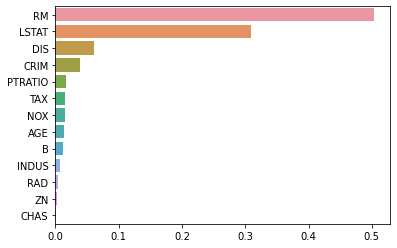

In [43]:
sns.barplot(x=feature_series, y=feature_series.index)

중요도가 큰 변수 6개 선택
> https://datawhatnow.com/feature-importance/

- 본 분석의 목적은 직접 주택을 구매하거나, 고객에게 주택을 추천하는 사람의 의사결정을 돕기 위한 것 
- '선택지'의 개수를 줄이는 것이 필요하므로, 집값에 영향을 미치는 순으로 중요한 변수 6개를 선택
> 참고 : 선택지 개수에 따른 응답 왜곡 http://kostat.go.kr/attach/journal/13-2-06.pdf



5) 본 분석의 결론

집값에 영향을 미치는 요소는 순서대로 1가구당 방 갯수, 저소득층 비율, 5대 고용중심들로부터의 거리, 범죄율, 학생-선생 비율, 재산세율이다. 

- 설명변수 채택 : RM, LSTAT, DIS, CRIM, PTRATIO, TAX

### 참고 : 여러 알고리즘과 성능 비교
- Decision Tree vs. Random Forest vs. GBM vs. XGBoost vs. LightGBM
> 트리 기반 머신러닝 모델을 전부 비교해 best 채택

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [47]:
y_target = housing['MEDV']
X_data = housing.drop(['MEDV'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.2, random_state=42)

In [48]:
def get_model_cv_prediction(model, X_data, y_target):

    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    
    print('## ', model.__class__.__name__, ':')
    print('5 folds의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [49]:
dt_reg = DecisionTreeRegressor(random_state=42, max_depth=5)
rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)
gb_reg = GradientBoostingRegressor(random_state=42, n_estimators=100)
xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=100)
lgb_reg = LGBMRegressor(n_estimators=100)

In [50]:
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]

for model in models:
    get_model_cv_prediction(model, X_train, y_train)

##  DecisionTreeRegressor :
5 folds의 평균 RMSE : 5.394 
##  RandomForestRegressor :
5 folds의 평균 RMSE : 3.819 
##  GradientBoostingRegressor :
5 folds의 평균 RMSE : 3.526 
##  XGBRegressor :
5 folds의 평균 RMSE : 3.586 
##  LGBMRegressor :
5 folds의 평균 RMSE : 3.725 


가장 성능이 좋은 GradientBoostingRegressor 채택 -> 하이퍼파리미터 최적화 과정을 거치면 LGBM쪽이 더 높게 나오는게 평균적이다

In [51]:
gb_reg.fit(X_data, y_target)

GradientBoostingRegressor(random_state=42)

In [52]:
feature_series = pd.Series(data=gb_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)

In [53]:
feature_series.head(6)

RM         0.410487
LSTAT      0.372855
DIS        0.082702
NOX        0.036725
PTRATIO    0.034847
CRIM       0.025564
dtype: float64

<AxesSubplot:>

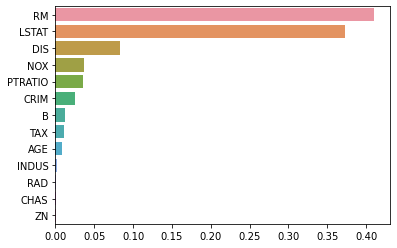

In [54]:
sns.barplot(x=feature_series, y=feature_series.index)

feature importance 해석과정은 생략